In [1]:
import numpy as np
import pandas as pd

In [2]:
bank = pd.read_csv("D://great learning//ensamble//bank-marketing-dataset//bank.csv")

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
bank.describe() # describing shows the satistical summary of the data 

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

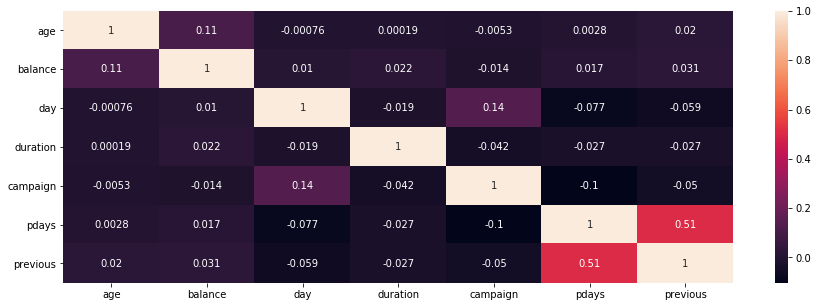

In [10]:
plt.figure(figsize=(15,5))
sns.heatmap(bank.corr() , annot = True)

In [11]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [13]:
bank.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [14]:
bank.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [15]:
bank.education.unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

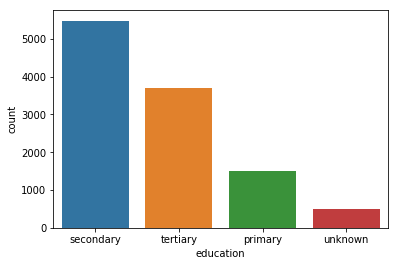

In [16]:
sns.countplot(bank.education) # secondary education have high values

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


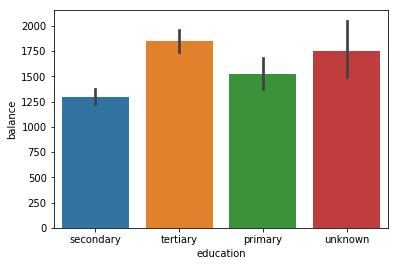

In [17]:
sns.barplot(x = 'education' , y = 'balance' , data = bank)

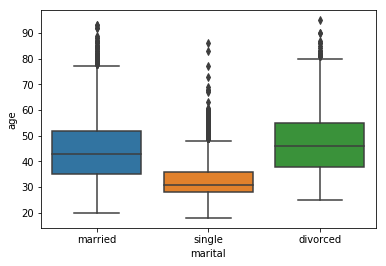

In [19]:
sns.boxplot(y = 'age' , x = 'marital' , data = bank )

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


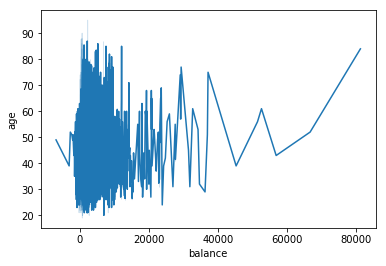

In [22]:
sns.lineplot(x = 'balance' , y = 'age' , data = bank)

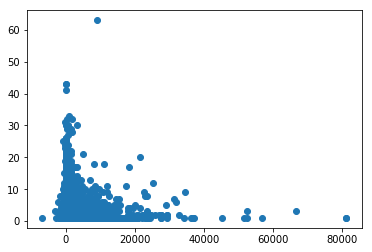

In [23]:
plt.scatter(x = 'balance' , y = 'campaign' , data = bank) # most of the values are lies between the 0 and 10,000.

In [33]:
bank[bank.balance==0]['balance'].describe()  #774 values have the zero values.


count    774.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: balance, dtype: float64

In [34]:
bank.balance.describe()


count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
la = LabelEncoder()

In [37]:
bank.deposit = la.fit_transform(bank.deposit)

In [38]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


In [40]:
newbank = bank.drop(['age' , 'job' , 'contact' , 'month' , 'poutcome'],axis = 1)

In [44]:
newbank.head()

,marital,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
0,married,secondary,0,2343,yes,no,5,1042,1,-1,0,1
1,married,secondary,0,45,no,no,5,1467,1,-1,0,1
2,married,secondary,0,1270,yes,no,5,1389,1,-1,0,1
3,married,secondary,0,2476,yes,no,5,579,1,-1,0,1
4,married,tertiary,0,184,no,no,5,673,2,-1,0,1


In [42]:
newbank.default.unique()

array(['no', 'yes'], dtype=object)

In [43]:
newbank.default = la.fit_transform(newbank.default)

In [45]:
# applyting the get dummy variables 

newb = pd.get_dummies(newbank)

In [46]:
newb.head()

,default,balance,day,duration,campaign,pdays,previous,deposit,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,loan_no,loan_yes
0,0,2343,5,1042,1,-1,0,1,0,1,0,0,1,0,0,0,1,1,0
1,0,45,5,1467,1,-1,0,1,0,1,0,0,1,0,0,1,0,1,0
2,0,1270,5,1389,1,-1,0,1,0,1,0,0,1,0,0,0,1,1,0
3,0,2476,5,579,1,-1,0,1,0,1,0,0,1,0,0,0,1,1,0
4,0,184,5,673,2,-1,0,1,0,1,0,0,0,1,0,1,0,1,0


In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
sc = StandardScaler()

In [49]:
scaled_bank = pd.DataFrame(sc.fit_transform(newb),columns = newb.columns)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [50]:
scaled_bank.head()

,default,balance,day,duration,campaign,pdays,previous,deposit,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,loan_no,loan_yes
0,-0.123617,0.252525,-1.265746,1.930226,-0.554168,-0.481184,-0.36326,1.053764,-0.361962,0.870355,-0.678403,-0.394014,1.018994,-0.702598,-0.215873,-1.055280,1.055280,0.387923,-0.387923
1,-0.123617,-0.459974,-1.265746,3.154612,-0.554168,-0.481184,-0.36326,1.053764,-0.361962,0.870355,-0.678403,-0.394014,1.018994,-0.702598,-0.215873,0.947616,-0.947616,0.387923,-0.387923
2,-0.123617,-0.080160,-1.265746,2.929901,-0.554168,-0.481184,-0.36326,1.053764,-0.361962,0.870355,-0.678403,-0.394014,1.018994,-0.702598,-0.215873,-1.055280,1.055280,0.387923,-0.387923
3,-0.123617,0.293762,-1.265746,0.596366,-0.554168,-0.481184,-0.36326,1.053764,-0.361962,0.870355,-0.678403,-0.394014,1.018994,-0.702598,-0.215873,-1.055280,1.055280,0.387923,-0.387923
4,-0.123617,-0.416876,-1.265746,0.867171,-0.186785,-0.481184,-0.36326,1.053764,-0.361962,0.870355,-0.678403,-0.394014,-0.981360,1.423289,-0.215873,0.947616,-0.947616,0.387923,-0.387923


In [51]:
# defining the x and y variables 

x = scaled_bank.drop('deposit' , axis = 1)
y = newb.deposit

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.30 , random_state = 100)

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dtree = DecisionTreeClassifier(max_depth = 10)

In [61]:
model = dtree.fit(xtrain,ytrain)

In [62]:
pred = model.predict(xtest)

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(ytest , pred)

0.7623171095849507

# applying the ensemble techniques

In [65]:
from sklearn.ensemble import BaggingClassifier

In [67]:
bag = BaggingClassifier(n_estimators=10)

In [69]:
model = bag.fit(xtrain,ytrain)
pred = model.predict(xtest)

In [70]:
accuracy_score(ytest , pred)

0.7721707972529113

# applying the the xg boost

In [71]:
!pip install xgboost

In [72]:
from sklearn.ensemble import AdaBoostClassifier

In [73]:
ada = AdaBoostClassifier()

In [74]:
model = ada.fit(xtrain,ytrain)

In [75]:
predictions = model.predict(xtest)

In [76]:
accuracy_score(ytest , predictions)

0.7981487011048074

In [77]:
# applying the gradient boost 

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

In [79]:
gra = GradientBoostingClassifier()

In [80]:
model = gra.fit(xtrain , ytrain)
predictions = model.predict(xtest)
accuracy_score(ytest , predictions)

0.8044192296207823

In [81]:
import xgboost as xgb

In [82]:
from xgboost.sklearn import XGBClassifier

In [85]:
xgb = XGBClassifier(max_depth= 10 , n_estimators=100)

In [91]:
model=xgb.fit(np.array(xtrain) , np.array(ytrain))

In [92]:
pre = model.predict(np.array(xtest))

In [93]:
accuracy_score(ytest , pre)

0.8014332636607943

# Grid Search

grid search method shows the best max depth and n_estimators that will improve your accuracy score 


In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [100]:
grid = GridSearchCV(estimator= rf, param_grid={"max_depth":[1,2,3,4,5,6,7,8,9,10],"n_estimators":[10,50,100]},cv=5)

In [101]:
grid.fit(xtrain,ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'n_estimators': [10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [102]:
grid.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [103]:
rf = RandomForestClassifier(max_depth= 10 , n_estimators= 100)

In [105]:
model = rf.fit(xtrain ,ytrain)

In [106]:
predictions = model.predict(xtest)

In [108]:
accuracy_score(ytest , predictions)

0.7999402806808003